<a href="https://colab.research.google.com/github/jozsefKecskesi/python-notebooks/blob/main/pandas_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas basics
First, check if pandas working properly in the current environment by creating a dataset of randomly distributed values and plotting itd histogram.

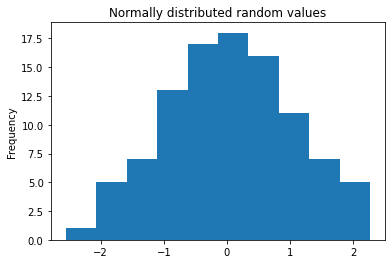

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
values = np.random.randn(100) # array of normally distributed random numbers
s = pd.Series(values) # generate a pandas series
s.plot(kind='hist', title='Normally distributed random values') # hist computes distribution
plt.show()

Check some statistics: mean, standard deviation etc.

In [3]:
s.describe()

count    100.000000
mean       0.059808
std        1.012960
min       -2.552990
25%       -0.643857
50%        0.094096
75%        0.737077
max        2.269755
dtype: float64

# Descriptive statistics
Descriptive statistics (mean, standard deviation, number of observations, minimum, maximum, and quartiles) of numerical columns can be calculated using the .describe() method, which returns a pandas dataframe of descriptive statistics.

In [6]:
df = pd.DataFrame({'A': [1, 2, 1, 4, 3, 5, 2, 3, 4, 1],
                   'B': [12, 14, 11, 16, 18, 18, 22, 13, 21, 17],
                   'C': ['a', 'a', 'b', 'a', 'b', 'c', 'b', 'a', 'b', 'a']})
df

,A,B,C
0,1,12,a
1,2,14,a
2,1,11,b
3,4,16,a
4,3,18,b
5,5,18,c
6,2,22,b
7,3,13,a
8,4,21,b
9,1,17,a


In [7]:
df.describe()

,A,B
count,10.000000,10.000000
mean,2.600000,16.200000
std,1.429841,3.705851
min,1.000000,11.000000
25%,1.250000,13.250000
50%,2.500000,16.500000
75%,3.750000,18.000000
max,5.000000,22.000000


Since C is not a numerical column, it is excluded from the output, but still possible to summarize some categorical data by number of observations, number of elements, mode, and frequency of the mode:

In [8]:
df['C'].describe()

count     10
unique     3
top        a
freq       5
Name: C, dtype: object

# Analysis
Quintile analysis is a common framework for evaluating the efficacy of security factors.

A factor is a method for scoring/ranking sets of securities. For a particular point in time and for a particular set of securities, a factor can be represented as a pandas series where the index is an array of the security identifiers and the values are the scores or ranks.

If we take factor scores over time, we can, at each point in time, split the set of securities into 5 equal buckets, or quintiles, based on the order of the factor scores. There is nothing particularly sacred about the number 5. We could have used 3 or 10. But we use 5 often. Finally, we track the performance of each of the five buckets to determine if there is a meaningful difference in the returns. We tend to focus more intently on the difference in returns of the bucket with the highest rank relative to that of the lowest rank.

In [9]:
num_securities = 1000
num_periods = 1000
period_frequency = 'W'
start_date = '2000-12-31'
np.random.seed([3,1415])
means = [0, 0]
covariance = [[  1., 5e-3],
              [5e-3,   1.]]
# generates to sets of data m[0] and m[1] with ~0.005 correlation
m = np.random.multivariate_normal(means, covariance,
                                  (num_periods, num_securities)).T